# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business objectives for this project are to mine the used car dataset and determine the features that have the highest correlation in purchasing a car. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

There are 4 major steps engineers and scientist should complete during the data understanding phase. 
   <ol>
    <li>Collect Initial Data and creating an Initial Data Collection Report</li>
    <li>Describe Data and creating a Data Description Report</li>
    <li>Explore Data and creating a Data Exploration Report</li>
    <li>Verify Data Quality and creating a Data Quality Report</li>
    <ol>

<h4>Initial Data Collection Report</h4>

For this project we will be looking at a used car dataset found in the on the Kagal website 

In [342]:
auto = pd.read_csv('data/vehicles.csv')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

<h4>Data Description Description Report</h4>
<br/>
<p>
The following provides a sample of the the dataset showing the last 10 rows in the data. There is a list providing the number of null values per column. There is a also a list containing the number of occurances of each values in each of the columns.
</p>

<center><b>Sample of the last 10 rows</b></center>


In [5]:
auto.tail(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,NaN,sedan,white,wy
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


<center><b>Number of null values per column</b></center>



In [5]:
auto.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

***Data Exploration*** 

<center><b>Number of occurances per columns</b></center>



In [29]:
for column in auto:
    print(auto[column].value_counts())

id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: count, Length: 426880, dtype: int64
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: int64
year
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1909

In [24]:
auto.query('price ==0').count()

id              32895
region          32895
price           32895
year            32895
manufacturer    32895
model           32895
condition       32895
cylinders       32895
fuel            32895
odometer        32895
title_status    32895
transmission    32895
VIN             32895
drive           32895
size            32895
type            32895
paint_color     32895
state           32895
dtype: int64

In [289]:
auto.query('price==0')

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
78419,fort collins / north CO,0,2007.0,toyota,excellent,6,gas,NaN,clean,manual,4wd,NaN,blue,co
124875,columbus,0,2017.0,bmw,NaN,4,gas,79929.0,clean,automatic,rwd,sedan,black,ga
80700,fort collins / north CO,0,2018.0,toyota,excellent,NaN,gas,26136.0,clean,automatic,NaN,NaN,NaN,co
126623,savannah / hinesville,0,2015.0,mercedes-benz,NaN,8,gas,78807.0,clean,automatic,4wd,sedan,grey,ga
80725,fort collins / north CO,0,2017.0,jeep,NaN,NaN,gas,71650.0,clean,automatic,4wd,SUV,red,co
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17306,fayetteville,0,2009.0,gmc,good,6,other,89432.0,clean,automatic,rwd,pickup,silver,ar
364915,austin,0,2008.0,gmc,NaN,NaN,gas,167426.0,clean,automatic,NaN,NaN,NaN,tx
213949,minneapolis / st paul,0,2014.0,cadillac,NaN,NaN,gas,84504.0,clean,automatic,4wd,NaN,black,mn
214469,minneapolis / st paul,0,2018.0,ford,excellent,None,gas,32550.0,clean,automatic,NaN,other,NaN,mn


<h4>Data Quality Report</h4>
<p>
    Exploring the data there are several key takeaways. 
    <ol> 
        <li> There are a total of 426K rows in this dataset </li>
        <li> The size feature only contains 120519 populated values. This might make the feature more noisy than              valuable.</li>
        <li> The ID and VIN columns are unique identifiers and not something that would correlate with the price of              the vehicle. Unless used as the dataset's index, these should be removed from our data. </li>
        <li>Most of our features are text values and must be transformed into numerical representations to 
            determine their correlation to the vehicle’s price.</li>
        <li>There were 32895 records with a price tag of 0.00 This should be dropped from our dataset. I also 
            decided to reduce the dataset down sales prices below 60K </li>
        <li>The cylinders feature is a numerical category and should be cleaned up to remove the text values of    
             cylinders and replace the other value with and empty value. </li>
        <li> The condition column can be updated with numberical representations using Ordinal Encoder.</li>
        <li> The model column will be dropped because it contains 28265 different values </li>
     </ol>
</p>     

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [405]:
## import ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [348]:
auto = pd.read_csv('data/vehicles.csv')


In [349]:
#update converting cylinders to a value numeric
auto['cylinders'] = auto['cylinders'].str.replace('cylinders', '')
auto['cylinders'].replace('other', None, inplace=True)
auto[['cylinders']] = auto[['cylinders']].apply(pd.to_numeric)


In [350]:
#removing records with price = 0 and prices 600000 
auto = auto[(auto.price > 0) & (auto.price < 60000)]


In [351]:
#dropping unneeded columns
auto= auto.drop(['size', 'VIN','id','model'], axis=1)


In [352]:
#limiting to year > than 1955 to reduce outliers 
auto = auto[auto['year'] >1955]

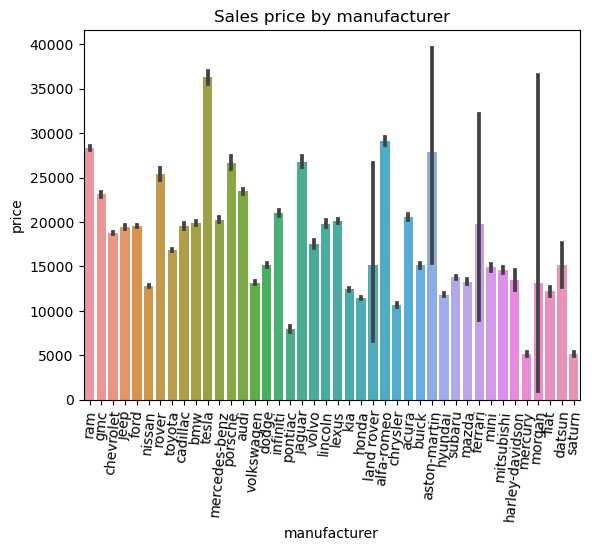

In [354]:
auto = auto.sort_values('price',ascending=False)
fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

sns.barplot(x='manufacturer', y='price' ,data=auto)
plt.xticks(rotation=85)
plt.title('Sales price by manufacturer')
plt.show()


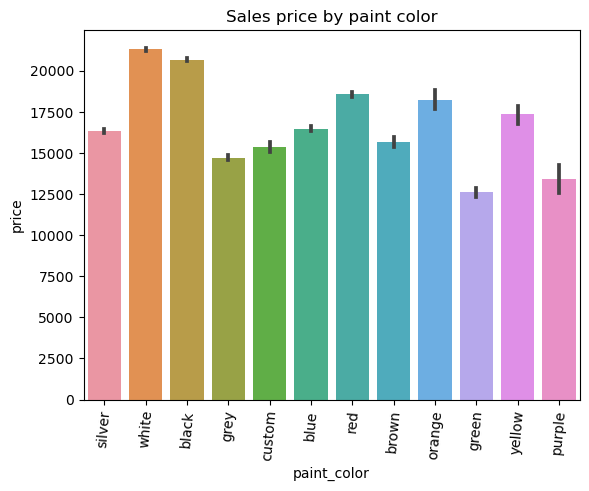

<Figure size 640x480 with 0 Axes>

In [444]:
auto = auto.sort_values('price',ascending=False)
fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

sns.barplot(x='paint_color', y='price' ,data=auto)
plt.xticks(rotation=85)
plt.title('Sales price by paint color')
plt.show()
plt.savefig('Images/SalesPaintColor.png')

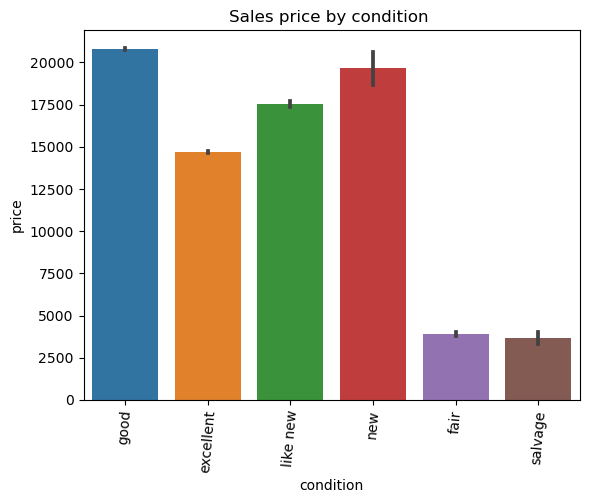

<Figure size 640x480 with 0 Axes>

In [445]:
auto = auto.sort_values('price',ascending=False)
fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

sns.barplot(x='condition', y='price' ,data=auto)
plt.xticks(rotation=85)
plt.title('Sales price by condition ')
plt.show()
plt.savefig('Images/SalesbyCondition.png')

In [388]:
X = auto[['odometer','year', 'title_status','manufacturer','condition']]
y  = auto['price']


In [389]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [392]:

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for OneHotEncoder categorical data
ohe_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop = 'if_binary'))
])

# Preprocessing for title categorical data
title_oe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('title_oe',  OrdinalEncoder(categories = [['parts only', 'salvage', 'missing', 'lien', 'rebuilt', 'clean']]))
])

# Preprocessing for categorical data
condition_oe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('condition_oe',  OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]))
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['odometer','year']),
        ('ohe', ohe_transformer, ['manufacturer']),
        ('title', title_oe, ['title_status']),
        ('conditioj', condition_oe, ['condition'])
    
    ])


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [416]:
model = LinearRegression()
pipeline_1 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
# Preprocessing of training data, fit model 
pipeline_1.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds1 = pipeline_1.predict(X_test)


In [420]:
model2 = RandomForestRegressor(n_estimators=50, random_state=0)

pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor),('model', model2) ])

# Preprocessing of training data, fit model 
pipeline_2.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds2 = pipeline_2.predict(X_test)


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [436]:
# Evaluate the model
# I am using the mean absolute error, mean_squared_error and r squared error to evaluate my models
abs_score1 = mean_absolute_error(y_test, preds1)
sq_score1 = mean_squared_error(y_test, preds1)
rr_score1 = r2_score(y_test, preds1)
print('MAE1:', abs_score1)
print('MSE1:', sq_score1)
print('R21:', rr_score1)
print('coef_:', model.coef_)


MAE1: 9342.922838932627
MSE1: 136692277.91696376
R21: 0.1927461264548136
coef_: [-6.65258052e-03  6.29410601e+02  5.33115374e-01  3.55862371e-01
  2.33287113e-03  1.41506824e+00  9.29131570e-01 -5.77277210e-01
  3.51876271e-01  1.79878839e+00 -1.53128702e+00 -9.88882544e-03
 -1.27823834e+00  2.31504528e-04 -1.84825065e-01  3.66333688e+00
  2.97287767e+00 -2.83350894e-02 -4.77638244e+00 -2.27000485e+00
  4.65485472e-01  6.07935639e-01  9.37680280e-01 -1.68058905e+00
  3.49810142e-04  6.34419966e-01  2.47229338e-01 -9.17895245e-01
  8.52620054e-01 -5.23779318e-01 -3.06719505e-01 -4.45126904e-01
 -9.98353361e-04 -3.48754016e+00 -7.93754340e-01  4.09813675e-01
  6.32127264e+00  5.08638358e-01 -5.25384183e-01 -1.45378969e+00
  5.43223526e-01 -1.04374720e+00 -1.69484377e+00 -2.08833397e-02
  7.63285397e+00 -8.07795861e+00]


<p>from the coffecients I can see that the odometer didnt have an impact on the price, but the year and title status did.
</p>

In [442]:
# I am using the mean absolute error, mean_squared_error and r squared error to evaluate my models
abs_score2 = mean_absolute_error(y_test, preds2)
sq_score2 = mean_squared_error(y_test, preds2)
rr_score2 = r2_score(y_test, preds2)
print('MAE2:', abs_score2)
print('MSE2:', sq_score2)
print('R22:', rr_score2)
model2.feature_importances_


MAE2: 3397.8173820033553
MSE2: 41722857.18098752
R22: 0.7536002868049


array([3.97827979e-01, 4.19908641e-01, 1.37687771e-03, 3.05824902e-04,
       8.94074550e-05, 1.97420706e-03, 3.10063100e-03, 1.73225988e-03,
       3.00260060e-03, 1.01227914e-02, 1.31669446e-03, 3.68712611e-05,
       3.01165152e-03, 5.87853843e-05, 1.02177038e-03, 1.57867363e-02,
       1.11613435e-02, 1.92781254e-04, 4.78201253e-03, 6.21740491e-03,
       1.15484677e-03, 1.03471369e-03, 4.83758961e-03, 6.28496141e-03,
       5.78269979e-05, 2.82141067e-03, 1.21800853e-03, 1.65214619e-03,
       4.22283366e-03, 8.33333255e-05, 8.65501104e-04, 3.71245166e-03,
       3.45328163e-06, 6.57585077e-03, 4.61082543e-04, 3.11945346e-03,
       1.97196414e-02, 2.54478205e-03, 6.27762970e-05, 2.22527201e-03,
       1.91656597e-03, 5.81717644e-03, 5.43464191e-03, 9.81490194e-04,
       9.93041519e-03, 3.02345030e-02])

<p>Looking at the important features I can see that the odometer and yer have more impact on the random forest model 
than the did in the linear regression model, while the title_status seems to have less impact. 
The type of model has an imapct as well and the codition has little impact.</p>

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

<p>After having completed our analysis of historical car sales, our machine-learning models have predicted that the price of a vehicle can be determined with 75% accuracy when focusing on the odometer, color, model, status of the title, and overall vehicle condition. 
</p>

<p>
We believe we can fine-tune our algorithm to increase its accuracy, but we will need a few more weeks to conduct our development.</p>

<p> Our next steps will be to increase our model’s accuracy and identify the specific values within each category that drive up a vehicle’s price. 
</p>
